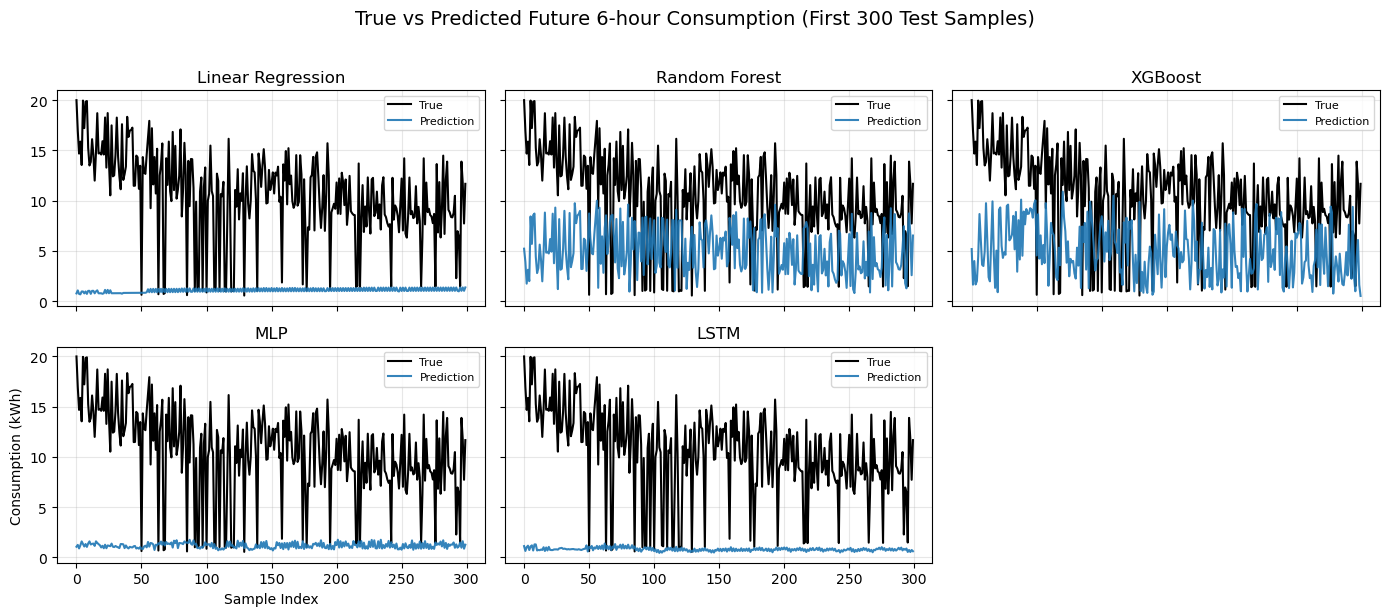

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load model test error files
lin_df  = pd.read_csv("best_model_predictions_elastic.csv")
rf_df   = pd.read_csv("rf_test_errors.csv")
xgb_df  = pd.read_csv("xgboost_test_errors.csv")
mlp_df  = pd.read_csv("MLP_test_errors.csv")
lstm_df = pd.read_csv("LSTM_test_errors.csv")

# 2. Extract true values (assumed aligned)
y_true = rf_df["y_true"].values
y_pred_lin  = lin_df["y_pred"].values
y_pred_rf   = rf_df["y_pred"].values
y_pred_xgb  = xgb_df["y_pred"].values
y_pred_mlp  = mlp_df["y_pred"].values
y_pred_lstm = lstm_df["y_pred"].values

# 3. Select a short segment for clearer visualization
N = 300  # number of samples to plot
idx = np.arange(N)

y_true_seg      = y_true[:N]
y_pred_lin_seg   = y_pred_lin[:N]
y_pred_rf_seg   = y_pred_rf[:N]
y_pred_xgb_seg  = y_pred_xgb[:N]
y_pred_mlp_seg  = y_pred_mlp[:N]
y_pred_lstm_seg = y_pred_lstm[:N]

# 4. Plot 2×3 subplots: True vs Prediction for each model
fig, axes = plt.subplots(2, 3, figsize=(14, 6), sharex=True, sharey=True)

axes = axes.flatten()

model_plots = [
    ("Linear Regression", y_pred_lin_seg, axes[0]),
    ("Random Forest", y_pred_rf_seg, axes[1]),
    ("XGBoost", y_pred_xgb_seg, axes[2]),
    ("MLP", y_pred_mlp_seg, axes[3]),
    ("LSTM", y_pred_lstm_seg, axes[4]),
]

for name, y_hat, ax in model_plots:
    # black = true, blue = prediction
    ax.plot(idx, y_true_seg, label="True", color="black", linewidth=1.5)
    ax.plot(idx, y_hat,      label="Prediction", color="C0", alpha=0.9)
    ax.set_title(name)
    ax.grid(alpha=0.3)
    ax.legend(loc="upper right", fontsize=8)

fig.delaxes(axes[5])

# Axis labels on bottom-left subplot
axes[3].set_xlabel("Sample Index")
axes[3].set_ylabel("Consumption (kWh)")

fig.suptitle(
    f"True vs Predicted Future 6-hour Consumption (First {N} Test Samples)",
    fontsize=14, y=1.02
)

plt.tight_layout()
plt.savefig("true_vs_pred_5models.png", dpi=300, bbox_inches="tight")
plt.show()
